# 微分断面積のグラフ作成

テキストファイルとして微分断面積のデータを用意する。  
データフォーマットは以下の通り  
角度　微分断面積　角度誤差　微分断面積の誤差  
以下の例では"Au.dat"がデータファイル  
ruMakeGraphErrors()という関数で誤差棒付きのグラフを生成することができる。

In [2]:
auto gre = ruMakeGraphErrors("Au.dat")

(TGraphErrors *) 0x7fe857bc9700


キャンパスを作成

In [3]:
auto c = new TCanvas("c","",600,600)

(TCanvas *) 0x7fe85835b500


背景となるヒストグラムを作成しておく

In [4]:
auto h2 = new TH2D("h2","",60,0,60,100,100,1e10)

(TH2D *) 0x7fe854650200


背景となるからのヒストグラムの上に誤差付きのグラフをプロットする。

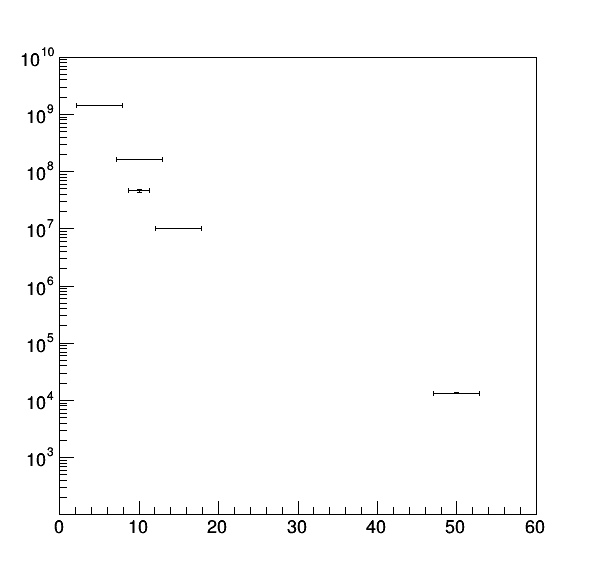

In [23]:
h2->Draw();
gre->Draw("P");
c->SetLogy();
c->Draw();

ラザフォードの公式による理論線を合わせてプロットしたい。  
ruMakeGraph()という関数が用意されているのでこれを使用する。  
用意すべきテキストファイルのフォーマットは以下の通り  
角度　微分断面積  
以下の例では"Au_theory.dat"がデータファイル

In [24]:
auto gr = ruMakeGraph("Au_theory.dat")

(TGraph *) 0x7fe857e43f30


理論線も重ねてプロットする。

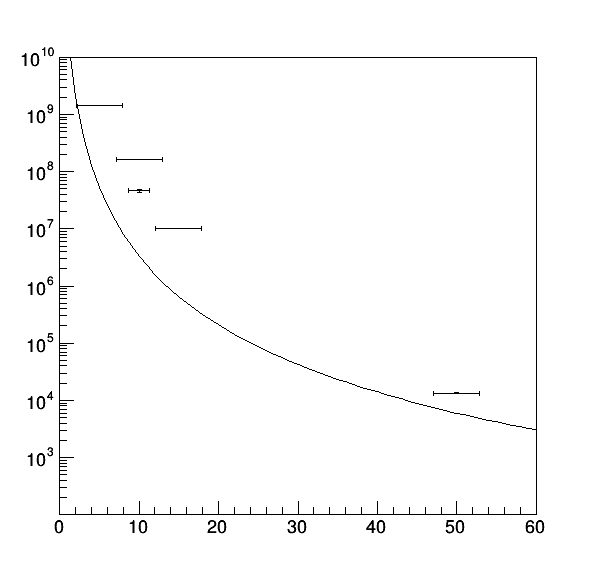

In [25]:
h2->Draw();
gre->Draw("P");
gr->Draw("L");
c->SetLogy();
c->Draw();

最後に凡例を付け加えたい  
以下のコマンドを実行する。

In [26]:
auto leg = new TLegend(0.6, 0.68, 0.9, 0.85, "", "NDC");
leg->AddEntry(gre, "data","pe");  // データ点、とエラーバー
leg->AddEntry(gr, "E = 4.1 MeV","l"); // ラインで表示
leg->SetBorderSize(0);
leg->Draw();

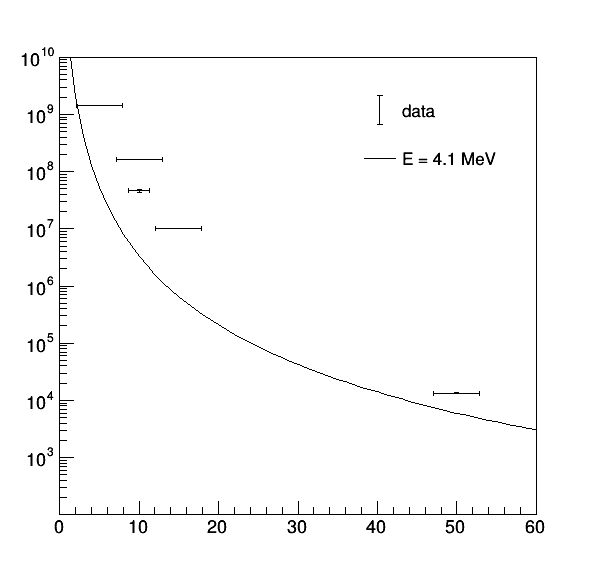

In [27]:
c->Draw()